<a href="https://colab.research.google.com/github/ankitrao260100-blip/HexSoftwares_Analyzing_and_Visualizing_Movie_Ratings.ipynb/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
covid_df = pd.read_csv(url)

# Display first rows
print("First 5 rows:")
print(covid_df.head())


# 2. Data Understanding

print("\nDataset Info:")
print(covid_df.info())

print("\nMissing Values:")
print(covid_df.isnull().sum())


First 5 rows:
         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB
None

Missing Values:
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [7]:
#3. Data Cleaning

# Convert Date column
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

# 4. Global Analysis
total_confirmed = covid_df['Confirmed'].sum()
total_deaths = covid_df['Deaths'].sum()
total_recovered = covid_df['Recovered'].sum()

print("\nGlobal COVID-19 Statistics")
print("Total Confirmed Cases:", total_confirmed)
print("Total Deaths:", total_deaths)
print("Total Recovered:", total_recovered)


Global COVID-19 Statistics
Total Confirmed Cases: 118939403514
Total Deaths: 2261860890
Total Recovered: 23491455947


In [8]:
# 5. Country-wise Analysis
country_cases = covid_df.groupby('Country')[['Confirmed','Deaths','Recovered']].max()

top_10 = country_cases.sort_values(by='Confirmed', ascending=False).head(10)

print("\nTop 10 Countries by Confirmed Cases:")
print(top_10)



Top 10 Countries by Confirmed Cases:
                Confirmed  Deaths  Recovered
Country                                     
US               80625120  988609    6298082
India            43042097  521751   30974748
Brazil           30250077  662185   17771228
France           27874269  145159     415111
Germany          23416663  132942    3659260
United Kingdom   21916961  172014      24693
Russia           17801103  365774    5609682
Korea, South     16305752   21092     180719
Italy            15659835  161602    4144608
Turkey           14991669   98551    5478185


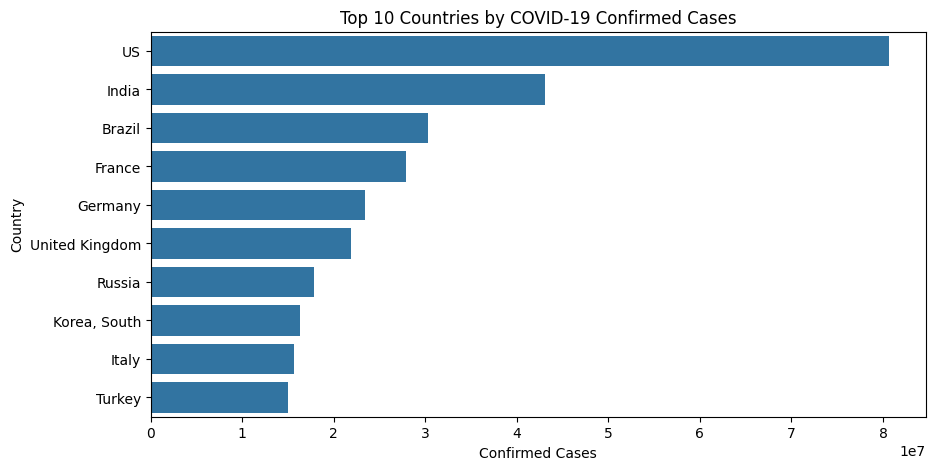

In [9]:
# 6. Visualization – Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_10['Confirmed'], y=top_10.index)
plt.title("Top 10 Countries by COVID-19 Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.show()

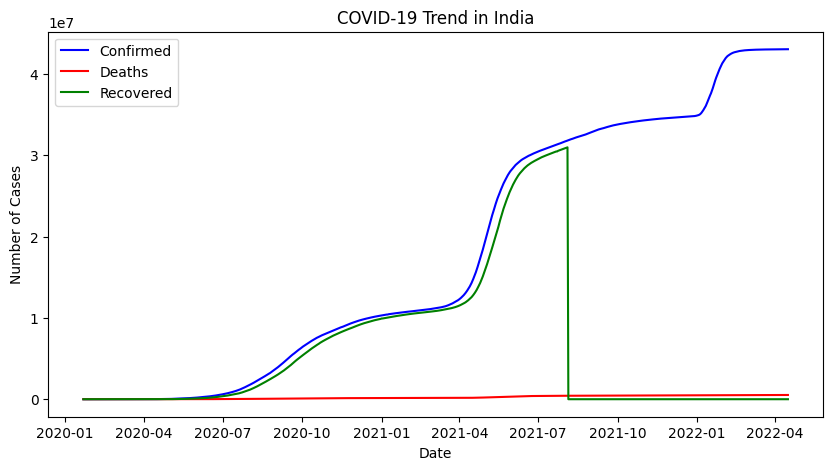

In [10]:
# 7. Trend Analysis (India)
india_data = covid_df[covid_df['Country'] == 'India']

plt.figure(figsize=(10,5))
plt.plot(india_data['Date'], india_data['Confirmed'], label='Confirmed', color='blue')
plt.plot(india_data['Date'], india_data['Deaths'], label='Deaths', color='red')
plt.plot(india_data['Date'], india_data['Recovered'], label='Recovered', color='green')

plt.title("COVID-19 Trend in India")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


Correlation Matrix:
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.906172   0.637339
Deaths      0.906172  1.000000   0.715072
Recovered   0.637339  0.715072   1.000000


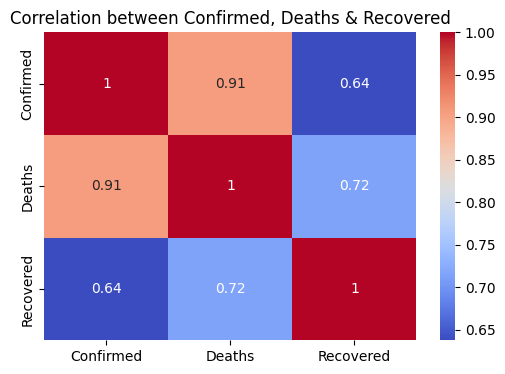

In [11]:
# 8. Correlation Analysis
correlation = country_cases.corr()
print("\nCorrelation Matrix:")
print(correlation)

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Confirmed, Deaths & Recovered")
plt.show()